# importing libraries


In [1]:
import time
from builtins import print

import math
import cv2
import numpy as np
import tensorflow as tf
from tensorflow import keras
from keras.models import Sequential
from tensorflow.keras import layers
# from keras.optimizers import Adam
from keras.metrics import categorical_crossentropy
from keras.preprocessing.image import ImageDataGenerator, load_img, img_to_array
from sklearn.metrics import confusion_matrix
import itertools
import os
import shutil
import random
import glob
import matplotlib.pyplot as plt
import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)
# %matplotlib inline

print('Import Done!')

from tensorflow.python.client import device_lib
print(device_lib.list_local_devices())

physical_devices = tf.config.experimental.list_physical_devices('GPU')
print("Num GPUs Available: ", len(physical_devices))
tf.config.experimental.set_memory_growth(physical_devices[0], True)

Import Done!
[name: "/device:CPU:0"
device_type: "CPU"
memory_limit: 268435456
locality {
}
incarnation: 4790319304454129632
, name: "/device:GPU:0"
device_type: "GPU"
memory_limit: 2913966491
locality {
  bus_id: 1
  links {
  }
}
incarnation: 1829120399415654154
physical_device_desc: "device: 0, name: NVIDIA GeForce GTX 1050 Ti, pci bus id: 0000:01:00.0, compute capability: 6.1"
]
Num GPUs Available:  1


In [2]:
import tensorflow as tf
if tf.test.gpu_device_name():
    print('Default GPU Device Details: {}'.format(tf.test.gpu_device_name()))
else:
    print("Please install Tensorflow that supports GPU")

Default GPU Device Details: /device:GPU:0


# sorting files

In [ ]:
# <editor-fold desc="exploring file manipulation">
# exploring file manipulation
path = 'D:\\resource\Char/'
path2 = 'D:\\resource\Char\zeroToNineDataset/'

res = []
for (dir_path, dir_names, file_names) in os.walk(path):
    res.extend(dir_names)
print(res)


path = 'D:\\resource\Char/'
path2 = 'D:\\resource\Char\zeroToNineDataset/'

for i in range(0, 10):
    list = os.listdir(path + str(i))
    number_files = len(list)
    print(number_files)
    print(list)
    portion = math.floor(0.5*number_files)
    portion2 = math.floor(0.75*number_files)



    # print(portion)
    # print(list[:portion])
    # print(list[portion:portion2])
    # print(list[portion2:])
    # for (dir_path, dir_names, file_names) in os.walk(path):
    #     print(list+file_names)

path = 'D:\\resource\Char/'
path2 = 'D:\\resource\Char\zeroToNineDataset/'

for i in range(0, 10):
    list = os.listdir(path + str(i))
    number_files = len(list)
    print(number_files)
    portion = math.floor(0.5*number_files)
    portion2 = math.floor(0.75*number_files)
    print(portion)
    print(list[:portion])
    print(list[portion:portion2])
    print(list[portion2:])

for i in range(0, 10):
    for file_name in os.listdir(path + str(i)):
        list = os.listdir(path + str(i))
        number_files = len(list);   print(number_files)

        portion = math.floor(0.5*number_files)
        portion2 = math.floor(0.75*number_files)
        source = path + list[:portion]
        destination = path2+'train/'+str(i)


list = np.arange(1, 101).tolist()
number_files = len(list)
print(number_files)
portion = math.floor(0.5*number_files)
portion2 = math.floor(0.75*number_files)
print(list[:portion])
print(list[portion:portion2])
print(list[portion2:])
list2= []

# end
# </editor-fold>


In [109]:
path = 'D:\\resource\Char/'
path2 = 'D:\\resource\Char\zeroToNineDataset/'

for i in range(0,10):
    list = os.listdir(path+str(i))
    number_files = len(list)
    print ('Total '+str(i)+':',number_files)
    print ('Train '+str(i)+':',int(number_files*0.8))

Total 0: 110
Train 0: 88
Total 1: 395
Train 1: 316
Total 2: 0
Train 2: 0
Total 3: 383
Train 3: 306
Total 4: 0
Train 4: 0
Total 5: 0
Train 5: 0
Total 6: 0
Train 6: 0
Total 7: 0
Train 7: 0
Total 8: 0
Train 8: 0
Total 9: 0
Train 9: 0


In [105]:
# train
for i in range(0,10):
    try:
        os.makedirs(path2+'train/'+str(i))
        for j in random.sample(glob.glob(path+str(i)+'/*'),
                               int(0.8*len(os.listdir(path+str(i))))):
                shutil.move(j, path2+'train/'+str(i))
        print ('Train '+str(i)+':',len(os.listdir(path2+'train/'+str(i))))

    except:
        print("Fail!")
        pass

print('Done')

Train 0: 873
Train 1: 3156
Train 2: 4325
Train 3: 3059
Train 4: 2664
Train 5: 2878
Train 6: 2866
Train 7: 2684
Train 8: 2965
Train 9: 2766
Done


In [106]:
# valid
for i in range(0,10):
    try:
        os.makedirs(path2+'valid/'+str(i))
        for j in random.sample(glob.glob(path+str(i)+'/*'),
                               int(0.5*len(os.listdir(path+str(i))))):
                shutil.move(j, path2+'valid/'+str(i))
        print ('valid '+str(i)+':',len(os.listdir(path2+'valid/'+str(i))))

    except:
        print("Fail!")
        pass

print('Done')

valid 0: 109
valid 1: 395
valid 2: 541
valid 3: 382
valid 4: 333
valid 5: 360
valid 6: 358
valid 7: 335
valid 8: 371
valid 9: 346
Done


In [112]:
# test
for i in range(0,10):
    try:
        os.makedirs(path2+'test/'+str(i))
        for j in random.sample(glob.glob(path+str(i)+'/*'),
                               int(1*len(os.listdir(path+str(i))))):
                shutil.move(j, 'test/'+str(i))
        print ('test '+str(i)+':',len(os.listdir(path2+'test/'+str(i))))

    except:
        print("Fail!")
        pass

print('Done')

Fail!
Fail!
Fail!
Fail!
Fail!
Fail!
Fail!
Fail!
Fail!
Fail!
Done


In [2]:
list = os.listdir('D:\\resource\Char\zeroToNineDataset\\train\\0') # dir is your directory path
number_files = len(list)
print (number_files)
# print(list)

871


In [118]:
from PIL import Image
dir = 'D:\\resource\Char\zeroToNineDataset\\train\\0\\2021-01-14_07-26-55-193_47J25422-IRN8.bmp'
img = Image.open(dir)

print(img.format)
print(img.size)
print(img.mode)
# img = cv2.imread(input_path)
print(img)
print("Done!")

BMP
(32, 32)
L
<PIL.BmpImagePlugin.BmpImageFile image mode=L size=32x32 at 0x20445B70B50>
Done!


<PIL.Image.Image image mode=RGB size=32x32 at 0x2041FA706D0>
(32, 32, 3)
[[[ 86.  86.  86.]
  [ 87.  87.  87.]
  [ 83.  83.  83.]
  ...
  [ 45.  45.  45.]
  [ 30.  30.  30.]
  [ 14.  14.  14.]]

 [[204. 204. 204.]
  [195. 195. 195.]
  [176. 176. 176.]
  ...
  [155. 155. 155.]
  [117. 117. 117.]
  [ 72.  72.  72.]]

 [[212. 212. 212.]
  [194. 194. 194.]
  [153. 153. 153.]
  ...
  [223. 223. 223.]
  [187. 187. 187.]
  [135. 135. 135.]]

 ...

 [[222. 222. 222.]
  [225. 225. 225.]
  [226. 226. 226.]
  ...
  [197. 197. 197.]
  [179. 179. 179.]
  [151. 151. 151.]]

 [[205. 205. 205.]
  [207. 207. 207.]
  [210. 210. 210.]
  ...
  [172. 172. 172.]
  [153. 153. 153.]
  [127. 127. 127.]]

 [[145. 145. 145.]
  [147. 147. 147.]
  [149. 149. 149.]
  ...
  [120. 120. 120.]
  [100. 100. 100.]
  [ 78.  78.  78.]]]


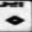

<PIL.Image.Image image mode=RGB size=32x32 at 0x20445B70A30>
(32, 32, 3)
[[[ 86.  86.  86.]
  [ 87.  87.  87.]
  [ 83.  83.  83.]
  ...
  [ 45.  45.  45.]
  [ 30.  30.  30.]
  [ 14.  14.  14.]]

 [[204. 204. 204.]
  [195. 195. 195.]
  [176. 176. 176.]
  ...
  [155. 155. 155.]
  [117. 117. 117.]
  [ 72.  72.  72.]]

 [[212. 212. 212.]
  [194. 194. 194.]
  [153. 153. 153.]
  ...
  [223. 223. 223.]
  [187. 187. 187.]
  [135. 135. 135.]]

 ...

 [[222. 222. 222.]
  [225. 225. 225.]
  [226. 226. 226.]
  ...
  [197. 197. 197.]
  [179. 179. 179.]
  [151. 151. 151.]]

 [[205. 205. 205.]
  [207. 207. 207.]
  [210. 210. 210.]
  ...
  [172. 172. 172.]
  [153. 153. 153.]
  [127. 127. 127.]]

 [[145. 145. 145.]
  [147. 147. 147.]
  [149. 149. 149.]
  ...
  [120. 120. 120.]
  [100. 100. 100.]
  [ 78.  78.  78.]]]


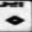

In [132]:
pic = load_img(dir)
print(pic)
pic_array = img_to_array(pic)
print(pic_array.shape)
print(pic_array)

pic

# creating model

In [2]:
train_path = 'D:\\resource\Char\zeroToNineDataset/train'
valid_path = 'D:\\resource\Char\zeroToNineDataset/valid'
test_path = 'D:\\resource\Char\zeroToNineDataset/test'

category=['0','1','2','3','4','5','6','7','8','9']

imageDataGen = ImageDataGenerator(rescale=1./255)

train_batches = imageDataGen.flow_from_directory(directory=train_path, target_size=(32,32), color_mode="grayscale", classes=category, batch_size=10)

valid_batches = imageDataGen.flow_from_directory(directory=valid_path, target_size=(32,32), color_mode="grayscale", classes=category, batch_size=10)

test_batches = imageDataGen.flow_from_directory(directory=test_path, target_size=(32,32), color_mode="grayscale",classes=category, batch_size=10, shuffle=False)

Found 28234 images belonging to 10 classes.
Found 3530 images belonging to 10 classes.
Found 3528 images belonging to 10 classes.


In [3]:
# help(train_batches)
print(len(test_batches)) #number of obj = number of data / batch size
print(test_batches)

print(len(test_batches.classes)) # number of pic
print(test_batches.classes)

np.dtype(train_batches)
# my_list = list(test_batches.classes)
# print(my_list[19])
# print(my_list)
#
# test_batches
# for element in my_list:
#     print(element)

353
3528
[0 0 0 ... 9 9 9]


C:\Users\sam\AppData\Local\Temp/ipykernel_16272/3804662883.py:8: DeprecationWarning: in the future the `.dtype` attribute of a given datatype object must be a valid dtype instance. `data_type.dtype` may need to be coerced using `np.dtype(data_type.dtype)`. (Deprecated NumPy 1.20)
  np.dtype(train_batches)


dtype('float32')

In [12]:
import sys
# np.set_printoptions(threshold=5)
imgs, labels = next(train_batches)
print(type(imgs))
print(imgs.shape)
# print(imgs[1][0][0])
print(imgs)

<class 'numpy.ndarray'>
(10, 32, 32, 1)
[[[[0.01960784]
   [0.02352941]
   [0.02352941]
   ...
   [0.05490196]
   [0.05490196]
   [0.05490196]]

  [[0.07058824]
   [0.07843138]
   [0.09803922]
   ...
   [0.20000002]
   [0.20392159]
   [0.21568629]]

  [[0.1137255 ]
   [0.14509805]
   [0.19215688]
   ...
   [0.2627451 ]
   [0.27450982]
   [0.28627452]]

  ...

  [[0.07450981]
   [0.10196079]
   [0.14117648]
   ...
   [0.227451  ]
   [0.22352943]
   [0.21568629]]

  [[0.05490196]
   [0.05882353]
   [0.06666667]
   ...
   [0.0509804 ]
   [0.05882353]
   [0.07058824]]

  [[0.04705883]
   [0.0509804 ]
   [0.05490196]
   ...
   [0.00784314]
   [0.01176471]
   [0.02352941]]]


 [[[0.14509805]
   [0.1764706 ]
   [0.21568629]
   ...
   [0.2901961 ]
   [0.2901961 ]
   [0.2901961 ]]

  [[0.3254902 ]
   [0.35686275]
   [0.3921569 ]
   ...
   [0.5176471 ]
   [0.52156866]
   [0.5254902 ]]

  [[0.5019608 ]
   [0.5529412 ]
   [0.59607846]
   ...
   [0.65882355]
   [0.68235296]
   [0.70980394]]

  ...


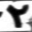

In [13]:
from keras.preprocessing.image import array_to_img
from keras.preprocessing import image
img = array_to_img(imgs[9])
img


In [23]:
def plotImages(images_arr):
    fig, axes = plt.subplots(1, 10, figsize=(20,20))
    axes = axes.flatten()
    for img, ax in zip( images_arr, axes):
        ax.imshow(img)
        ax.axis('off')
    plt.tight_layout()
    plt.show()

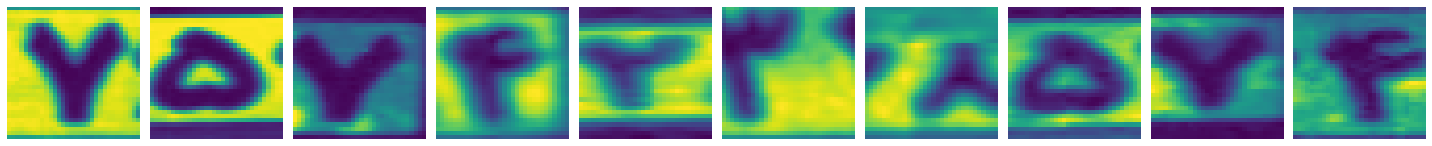

[[0. 0. 0. 0. 0. 0. 0. 1. 0. 0.]
 [0. 0. 0. 0. 0. 1. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 1. 0. 0.]
 [0. 0. 0. 0. 1. 0. 0. 0. 0. 0.]
 [0. 0. 1. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 1. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 1. 0.]
 [0. 0. 0. 0. 0. 1. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 1. 0. 0.]
 [0. 0. 0. 0. 1. 0. 0. 0. 0. 0.]]


In [24]:
#using one hot coding for labels
plotImages(imgs)
print(labels)

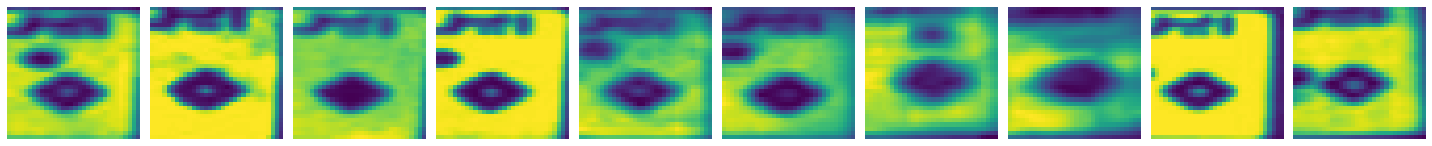

[[1. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [1. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [1. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [1. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [1. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [1. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [1. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [1. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [1. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [1. 0. 0. 0. 0. 0. 0. 0. 0. 0.]]
[0 0 0 ... 9 9 9]


In [25]:
test_imgs, test_labels = next(test_batches)
plotImages(test_imgs)
print(test_labels)
print(test_batches.classes)

In [53]:
model = Sequential([
    layers.Conv2D(filters=32, kernel_size=(5, 5), activation='relu', padding = 'same', input_shape=(32, 32,1)),
    layers.MaxPool2D(pool_size=(2, 2), strides=2),
    layers.Conv2D(filters=64, kernel_size=(3, 3), activation='relu', padding = 'same'),
    layers.MaxPool2D(pool_size=(2, 2), strides=2),
    layers.Flatten(),
    layers.Dense(units=10, activation='softmax')
])
print("Done!")


# <editor-fold desc="another way of creating layers of model">
# model5  = tf.keras.models.Sequential()
# model5.add(layers.Conv2D(filters=32, kernel_size=(5, 5), activation='relu', padding = 'same', input_shape=(32, 32,3)))
# model5.add(layers.MaxPool2D(pool_size=(2, 2), strides=2))
# model5.add(layers.Conv2D(filters=64, kernel_size=(3, 3), activation='relu', padding = 'same'))
# model5.add(layers.MaxPool2D(pool_size=(3, 3), strides=2),)
# model5.add(layers.Flatten())
# model5.add(layers.Dense(units=10, activation='softmax'))
# print('Ejra shodam XD')
# </editor-fold>

# <editor-fold desc="Feature extraction with a Sequential model">
# feature_extractor = keras.Model(
#     inputs=model.inputs,
#     outputs=[layer.output for layer in model.layers],
# )
#
# # Call feature extractor on test input.
# x = tf.ones((1, 250, 250, 3))
# features = feature_extractor(x)
# features
# </editor-fold>

Done!


In [54]:
model.summary()

Model: "sequential_3"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_6 (Conv2D)            (None, 32, 32, 32)        832       
_________________________________________________________________
max_pooling2d_6 (MaxPooling2 (None, 16, 16, 32)        0         
_________________________________________________________________
conv2d_7 (Conv2D)            (None, 16, 16, 64)        18496     
_________________________________________________________________
max_pooling2d_7 (MaxPooling2 (None, 8, 8, 64)          0         
_________________________________________________________________
flatten_3 (Flatten)          (None, 4096)              0         
_________________________________________________________________
dense_3 (Dense)              (None, 10)                40970     
Total params: 60,298
Trainable params: 60,298
Non-trainable params: 0
__________________________________________________

In [55]:
# Using callbacks
callbacks = [
    keras.callbacks.EarlyStopping(
        # Stop training when `val_loss` is no longer improving
        monitor="val_loss",
        # "no longer improving" being defined as "no better than 1e-2 less"
        min_delta=1e-2,
        # "no longer improving" being further defined as "for at least 2 epochs"
        patience=2,
        verbose=1,
    )
]

In [ ]:
# <editor-fold desc="Using learning rate schedules">
initial_learning_rate = 0.1
lr_schedule = keras.optimizers.schedules.ExponentialDecay(
    initial_learning_rate, decay_steps=100000, decay_rate=0.96, staircase=True
)

optimizer = keras.optimizers.RMSprop(learning_rate=lr_schedule)
# </editor-fold>

In [57]:
from tensorflow.keras.optimizers import Adam
model.compile(optimizer= Adam(learning_rate=0.0003), loss='categorical_crossentropy', metrics=['accuracy'])

In [ ]:
# model.compile(optimizer='adam',loss='categorical_crossentropy',metrics=['accuracy'])

In [58]:
hist = model.fit(x=train_batches,
    steps_per_epoch=len(train_batches),
    validation_data=valid_batches,
    validation_steps=len(valid_batches),
    epochs=10,
    verbose=2
)
print('Done!')

Epoch 1/10
2824/2824 - 292s - loss: 0.4978 - accuracy: 0.8622 - val_loss: 0.2400 - val_accuracy: 0.9447
Epoch 2/10
2824/2824 - 31s - loss: 0.2123 - accuracy: 0.9535 - val_loss: 0.2010 - val_accuracy: 0.9531
Epoch 3/10
2824/2824 - 33s - loss: 0.1641 - accuracy: 0.9659 - val_loss: 0.1406 - val_accuracy: 0.9706
Epoch 4/10
2824/2824 - 31s - loss: 0.1374 - accuracy: 0.9728 - val_loss: 0.1217 - val_accuracy: 0.9754
Epoch 5/10
2824/2824 - 32s - loss: 0.1207 - accuracy: 0.9755 - val_loss: 0.1001 - val_accuracy: 0.9809
Epoch 6/10
2824/2824 - 31s - loss: 0.1067 - accuracy: 0.9796 - val_loss: 0.0900 - val_accuracy: 0.9826
Epoch 7/10
2824/2824 - 32s - loss: 0.0956 - accuracy: 0.9811 - val_loss: 0.0800 - val_accuracy: 0.9853
Epoch 8/10
2824/2824 - 31s - loss: 0.0860 - accuracy: 0.9834 - val_loss: 0.0714 - val_accuracy: 0.9870
Epoch 9/10
2824/2824 - 32s - loss: 0.0779 - accuracy: 0.9854 - val_loss: 0.0672 - val_accuracy: 0.9862
Epoch 10/10
2824/2824 - 31s - loss: 0.0723 - accuracy: 0.9857 - val_loss

In [90]:
import os.path

if os.path.isfile("D:\pycharm\kerass\models") is False:
    model.save("D:\pycharm\kerass\models\zeroToNineOurDatasettamrin.h5")
    print("Model Saved")

Model Saved


In [15]:
#load model
model = keras.models.load_model("D:\pycharm\kerass\models\zeroToNineOurDataset.h5")


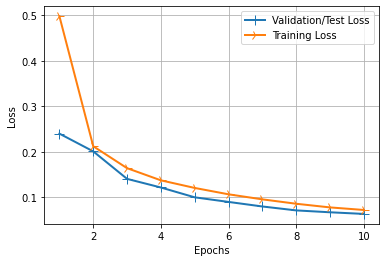

In [59]:
# Plotting our loss charts
import matplotlib.pyplot as plt

# Use the History object we created to get our saved performance results
history_dict = hist.history

# Extract the loss and validation losses
loss_values = history_dict['loss']
val_loss_values = history_dict['val_loss']

# Get the number of epochs and create an array up to that number using range()
epochs = range(1, len(loss_values) + 1)

# Plot line charts for both Validation and Training Loss
line1 = plt.plot(epochs, val_loss_values, label='Validation/Test Loss')
line2 = plt.plot(epochs, loss_values, label='Training Loss')
plt.setp(line1, linewidth=2.0, marker = '+', markersize=10.0)
plt.setp(line2, linewidth=2.0, marker = '4', markersize=10.0)
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.grid(True)
plt.legend()
plt.show()

In [ ]:
# keras site
import pydot
import pydotplus
import graphviz
# keras.utils.plot_model(model, "my_first_model.png")

In [60]:
val_loss, val_acc = model.evaluate(x=valid_batches)
print(val_loss)
print(val_acc)

2824/2824 [==============================] - 18s 6ms/step - loss: 0.0636 - accuracy: 0.9866
0.06362313032150269
0.9866473078727722


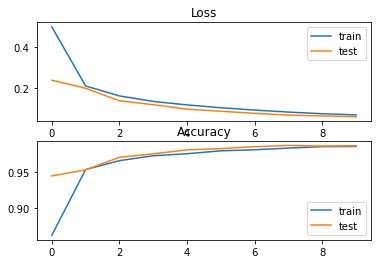

In [61]:
# <editor-fold desc="show Loss and Accuracy">
# from idlelib import history
from matplotlib import pyplot
# plot loss during training
pyplot.subplot(211)
pyplot.title('Loss')
pyplot.plot(hist.history['loss'], label='train')
pyplot.plot(hist.history['val_loss'], label='test')
pyplot.legend()
# plot accuracy during training
pyplot.subplot(212)
pyplot.title('Accuracy')
pyplot.plot(hist.history['accuracy'], label='train')
pyplot.plot(hist.history['val_accuracy'], label='test')
pyplot.legend()
pyplot.show()
# </editor-fold>

In [62]:
predictions = model.predict(test_batches)
print(predictions)

[[9.9814498e-01 5.3934320e-05 4.0153987e-04 ... 4.5644737e-07
  8.0700362e-09 9.1685163e-04]
 [9.9986613e-01 3.9055513e-07 1.1457859e-04 ... 2.4146100e-08
  3.3653336e-08 5.7269267e-07]
 [9.9925035e-01 1.8857003e-05 2.7155675e-04 ... 2.6224122e-06
  5.1173076e-05 5.5058994e-05]
 ...
 [2.4274770e-14 2.3723718e-04 3.3264516e-07 ... 3.8530751e-10
  2.9315840e-06 9.9966216e-01]
 [6.6090209e-08 7.7800453e-03 2.9144798e-07 ... 1.8009944e-08
  5.9857280e-07 9.9217296e-01]
 [1.9905202e-10 2.2270058e-04 9.8773735e-06 ... 3.5523019e-08
  1.0995309e-04 9.9854088e-01]]


In [123]:
from tensorflow.python.keras import backend


# def call(self, inputs, training=1):
#   if training is None:
#     training = backend.learning_phase()

# tf.keras.backend.set_learning_phase(1)

with tf.device('/gpu:0'):
    import time
    t = time.time()
    predictions = model.predict(x=imgs, steps=len(imgs), verbose=1, trainable = False)
    # predictions = model(imgs)

    print(time.time()-t)

# print(np.round(predictions))

TypeError: predict() got an unexpected keyword argument 'trainable'

In [122]:
with tf.device('/cpu:0'):
    # // GPU stuff
    import time
    t = time.time()
    predictions = model.predict(x=test_batches, steps=len(test_batches), verbose=1)
    print(time.time()-t)

353/353 [==============================] - 2s 7ms/step
2.5452544689178467


In [64]:
predictions

array([[9.9814498e-01, 5.3934320e-05, 4.0153987e-04, ..., 4.5644737e-07,
        8.0700362e-09, 9.1685163e-04],
       [9.9986613e-01, 3.9055513e-07, 1.1457859e-04, ..., 2.4146100e-08,
        3.3653336e-08, 5.7269267e-07],
       [9.9925035e-01, 1.8857003e-05, 2.7155675e-04, ..., 2.6224122e-06,
        5.1173076e-05, 5.5058994e-05],
       ...,
       [2.4274770e-14, 2.3723718e-04, 3.3264516e-07, ..., 3.8530751e-10,
        2.9315840e-06, 9.9966216e-01],
       [6.6090209e-08, 7.7800453e-03, 2.9144798e-07, ..., 1.8009944e-08,
        5.9857280e-07, 9.9217296e-01],
       [1.9905202e-10, 2.2270058e-04, 9.8773735e-06, ..., 3.5523019e-08,
        1.0995309e-04, 9.9854088e-01]], dtype=float32)

In [65]:
np.round(predictions)

array([[1., 0., 0., ..., 0., 0., 0.],
       [1., 0., 0., ..., 0., 0., 0.],
       [1., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 1.],
       [0., 0., 0., ..., 0., 0., 1.],
       [0., 0., 0., ..., 0., 0., 1.]], dtype=float32)

In [66]:
def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')

    print(cm)

    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, cm[i, j],
            horizontalalignment="center",
            color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')

In [67]:
cm = confusion_matrix(y_true=test_batches.classes, y_pred=np.argmax(predictions, axis=-1))

In [68]:
print(test_batches.class_indices)

{'0': 0, '1': 1, '2': 2, '3': 3, '4': 4, '5': 5, '6': 6, '7': 7, '8': 8, '9': 9}


Confusion matrix, without normalization
[[108   0   0   0   0   0   1   0   0   1]
 [  0 386   3   1   1   0   0   1   2   1]
 [  1   2 522   7   0   4   0   2   0   2]
 [  0   1  11 363   4   1   1   0   0   2]
 [  0   1   1   0 329   0   0   1   0   1]
 [  1   2   0   1   3 349   0   1   2   0]
 [  0   1   0   1   2   0 354   0   0   0]
 [  0   3   0   1   2   1   0 327   1   0]
 [  0   3   1   0   0   0   1   1 362   2]
 [  0   4   2   0   1   1   0   0   0 337]]


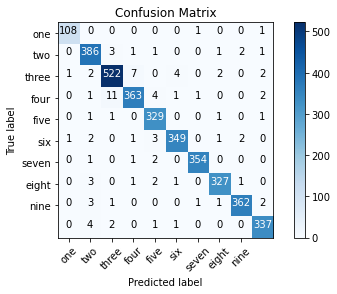

In [69]:
cm_plot_labels = ['one', 'two', 'three', 'four', 'five', 'six', 'seven', 'eight', 'nine']

plot_confusion_matrix(cm=cm, classes=cm_plot_labels, title='Confusion Matrix')

# test

<PIL.Image.Image image mode=L size=32x32 at 0x1B46EA91160>


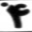

In [57]:
dir = 'D:\\resource\Char\zeroToNineDataset/test/4/2021-01-14_07-34-30-514_47H71420-IRN0.bmp'
from PIL import Image
pic = Image.open(dir).convert('L')
# pic = load_img(dir)
print(pic)
pic_array = img_to_array(pic)
pic_array.shape
pic

In [59]:
def get_available_devices():
    local_device_protos = device_lib.list_local_devices()
    return [x.name for x in local_device_protos]

get_available_devices()

['/device:CPU:0', '/device:GPU:0']

In [58]:
pic_array = pic_array.reshape((1,) + pic_array.shape) # Converting into 4 dimension array
pic_array.shape

(1, 32, 32, 1)

In [106]:
import time
with tf.device('/gpu:0'):
    t = time.time()
    predictions1 = model.predict(pic_array)
    print(time.time()-t)

    t = time.time()
    print(model(pic_array))
    print(time.time()-t)

0.05585169792175293
tf.Tensor([[0. 0. 0. 0. 1. 0. 0. 0. 0. 0.]], shape=(1, 10), dtype=float32)
0.0059850215911865234


In [99]:
import time
with tf.device('/cpu:0'):
    t = time.time()
    predictions1 = model.predict(pic_array)
    print(time.time()-t)

0.05782008171081543


In [88]:
predictions1

array([[0., 0., 0., 0., 1., 0., 0., 0., 0., 0.]], dtype=float32)

In [89]:
np.round(predictions1)

array([[0., 0., 0., 0., 1., 0., 0., 0., 0., 0.]], dtype=float32)